Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = ""
COLLABORATORS = ""

---

<div class="alert alert-block alert-info">
<h3>Student(s) Information</h3> Please provide information about yourself.<br>
<b>Name1</b>: <br>
<b>Name2 (optional) </b>:<br>
<b>NetID 1</b>: <br>
<b>NetID 2 (optional)</b>:<br>
<b>Group Project Declaration</b> (please provide a brief description of your partners contribution to the project below. Do not discuss with partner before writing this):<br>
<br>
<b>IMPORTANT</b>
Your work will not be graded withour your initials below<br>
I certify that this lab represents my own work and I have read the RU academic intergrity policies at  https://newbrunswick.rutgers.edu/chancellor/academic-integrity-students<br>
<b>Initials</b>:      
<br>
</div>

### Partner Contribution Statement (for Group projects only)
Please write a description of how your partner contributed to this project. Your partner <b>should not see</b> what you write. You will submit your own project copy to codebench after completing this part.

## Important
<font color='red'>
This project is provided to you as a class project in CS439. **DO NOT** post this notebook in any public or commerical space. Doing so may result in severe penalties. Please discuss with instructor if you have questions. 
</font>

# CS 439 - Introduction to Data Science
### Fall 2023

# Midsemester Project : Twitter Data Analysis

### Due Date : Wednesday November 15th, 2023 by 11:59 PM 


### Completing this project
This is your mid-semester project. You can work on this project individually or as part of a group of 2.
    
#### 1. Working with a partner
Only one partner (max two per group) is allowed. Each person in the group is expected to contribute equally to the project. The team needs to do work equivalent to 2 individuals. We will be strict in grading criteria for groups. The team also needs to work hard to find good answers for Part 1, Part 6 and Part 7. A post questionaire may be given to assess each person contribution. <b>Each person in the team MUST submit a copy</b> of the project. You MUST complete the survey on canvas announcements/

#### 2. Working by yourself
If you work by yourself, Do <b>Parts 2-5</b>. You have three parts optional. Part 1, Part 6 and Part 7. You are welcome to try those Parts just to learn things. No extra credit.


## Project Purpose    
 
The goal of this mid-semester project is to work with Twitter API to analyze tweets from a person, and in this case, Former President Donald Trump.  @RealDonaldTrump tweets provide a great opportunity to understand how online media can be used to communicate over the traditional media. In fact, social media post are so influential, now the traditional media spends considerable amount of time discussing social media posts. Tweets from people like Donald Trump and Elon Musk have become so consequential, they can move the stock market on short term and get network TV to debate and discuss hours and hours about what Trump or Musk meant.

We hope this project will be fun as we can analyze range of emotions, hope, controversy, vagueness that are part of Trump tweets. We are interested in seeing what conclusions you can draw from former US Presidents tweets. 
* DISCLAIMER: This project is not designed with any bias in mind. Note that we can pick any person (Hillary Clinton or Donald Trump or Elon Musk) or anyone else to do the same analysis. We hope your analysis is objective, independent of any political bias you may have. As Data Scientists, it is our responsiblity to do independent analysis of the data we try to understand. You should follow data and interpret insights w/o any bias.

## Grading of the Project
You can test your project with the files provided. We may test the correctness of your code using **different files**. As a result, we will not provide sample outputs for this project. You will need to determine if the output received is reasonable. We are not looking for 100% compatibility with any one data set.

## Set up
Let us get all the libaries initialized as necessary

In [2]:
# Run this cell to set up your notebook
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import json

# Ensure that Pandas shows at least 280 characters in columns, so we can see full tweets
pd.set_option('max_colwidth', 280)

%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set()
sns.set_context("talk")
import re

## Downloading Recent Tweets (group only)
It is important to download the most recent tweets (especially if you are working as a group). You cannot download the recent tweets by @realdonaldtrump as he was inactive for last two years. But you can download tweets from @elonmusk or @joebiden to see how things work. Those who are working by themselves are allowed to use the downloaded files in data folder w/o setting up access to any twitter API (which can sometime be bit complicated). Twitter provides the API Tweepy (http://www.tweepy.org/) that makes it easy to access twitter content that is publicly available. We will also provide example code as needed.

In [3]:
## Make sure you have set up tweepy if you are working locally.
# https://www.pythoncentral.io/introduction-to-tweepy-twitter-for-python/
# After set up, the following should run:
#import tweepy

## PART 1:  Accessing Twitter API  (optional for individuals)
In order to access Twitter API, you need to get keys by signing up as a Twitter developer. We will walk you through this process. 
* if you are working by yourself on this project, you can skip PART 1, and complete the project using the data files provided in the data folder instead. We highly recommend that you do Part 1 as an individual (after completing the project with offline data). You will "learn" how to use Twitter API that might be useful for learning how to work with API's.

### Task 1.1

Follow the instructions below to get your Twitter API keys.  **Read the instructions completely before starting.**

1. [Create a Twitter account](https://twitter.com/).  You can use an existing account if you have one; if you prefer to not do this assignment under your regular account, feel free to create a throw-away account.
2. Under account settings, add your phone number to the account.
3. [Create a Twitter developer account](https://developer.twitter.com/en) by clicking the 'Apply' button on the top right of the page. Attach it to your Twitter account. You'll have to fill out a form describing what you want to do with the developer account. Explain that you are doing this for a class at Rutgers University and that you don't know exactly what you're building yet and just need the account to get started. These applications are approved by some sort of AI system, so it doesn't matter exactly what you write. Just don't enter a bunch of alweiofalwiuhflawiuehflawuihflaiwhfe type stuff or you might get rejected.
4. Once you're logged into your developer account, [create an application for this assignment](https://developer.twitter.com/en/docs/projects/overview).  You can call it whatever you want, and you can write any URL when it asks for a web site.  You don't need to provide a callback URL.
5. On the page for that application, find your Consumer Key and Consumer Secret.
6. On the same page, create an Access Token.  Record the resulting Access Token and Access Token Secret.
7. Edit the file [keys.json](keys.json) and replace the placeholders with your keys.

## WARNING (Please Read) !!!!


### Protect your Twitter Keys
<span style="color:red">
If someone has your authentication keys, they can access your Twitter account and post as you!  So don't give them to anyone, and **don't write them down in this notebook**. 
</span>
The usual way to store sensitive information like this is to put it in a separate file and read it programmatically.  That way, you can share the rest of your code without sharing your keys.  That's why we're asking you to put your keys in `keys.json` for this assignment.


### Avoid making too many API calls.

<span style="color:red">
Twitter limits developers to a certain rate of requests for data.  If you make too many requests in a short period of time, you'll have to wait awhile (around 15 minutes) before you can make more.  </span> 
So carefully follow the code examples you see and don't rerun cells without thinking.  Instead, always save the data you've collected to a file.  We've provided templates to help you do that.


### Be careful about which functions you call!

<span style="color:red">
This API can retweet tweets, follow and unfollow people, and modify your twitter settings.  Be careful which functions you invoke! </span> It is possible that you can accidentally re-tweet some tweets because you typed `retweet` instead of `retweet_count`. 
</span>


### Reading Keys.json

In [4]:
#import json
#key_file = 'keys.json'
# Loading your keys from keys.json (which you should have filled in question 1):
#with open(key_file) as f:
 #   keys = json.load(f)
# if you print or view the contents of keys be sure to delete the cell!

### Task 1.2 Testing Twitter Authentication
This following code should run w/o errors or warnings and display Rutgers University's twitter username

#### Getting more information from RutgersU
Find the following information about RutgersU. Show code and use a print statement to print the output.

In [5]:
# What is RutgersU screen name?

# What is the location RutgersU?

# What is a description for RutgersU?

# How many follow RutgersU?

# When was RutgersU account created?

# Is RutgersU a verified account?


### Task 1.3

### Refactor and Extend Code

Re-factor the above twitter authentication code and extend the code into reusable snippets below.  

### Task 1.4
If everything was implemented correctly you should be able to obtain roughly the last max number of tweets by @RutgersU. (This may take a few minutes)

## PART 2 - Working with Twitter Data (group/individual)
The json file in data folder contains some loaded tweets from @RutgersU and @realdonaldtrump. Run the folllowing code and read and understand and what it does. Groups must download the latest tweets from @RutgersU using tweepy (and call that). Individuals can use the given file.

In [6]:
from pathlib import Path
import json

ds_tweets_save_path = "/srv/shared/RutgersU_recent_tweets.json"   # need to get this file

# Guarding against attempts to download the data multiple
# times:
#if not Path(ds_tweets_save_path).is_file():
    # Getting as many recent tweets by @RutgersU as Twitter will let us have.
    # We use tweet_mode='extended' so that Twitter gives us full 280 character tweets.
    # This was a change introduced in September 2017.
    
    # The tweepy Cursor API actually returns "sophisticated" Status objects but we 
    # will use the basic Python dictionaries stored in the _json field. 
    #example_tweets = [t._json for t in tweepy.Cursor(api.user_timeline, screen_name="RutgersU", 
                                             #tweet_mode='extended').items()]
    
    # Saving the tweets to a json file on disk for future analysis
    #with open(ds_tweets_save_path, "w") as f:        
        #json.dump(example_tweets, f)

# Re-loading the json file:
with open(ds_tweets_save_path, "r") as f:
    example_tweets = json.load(f)

### Task 2.1 - First 10 Tweets

If things ran as expected, you should be able to look at the first tweet by running the code below. It probabably does not make sense to view all tweets in a notebook, as size of the tweets can freeze your browser (always a good idea to press ctrl-S to save the latest, in case you have to restart Jupyter)

In [7]:

# Looking at one tweet object, which has type Status: 
from pprint import pprint # ...to get a more easily-readable view.
pprint(example_tweets[0])

{'contributors': None,
 'coordinates': None,
 'created_at': 'Sat Nov 02 23:02:49 +0000 2019',
 'display_text_range': [0, 140],
 'entities': {'hashtags': [{'indices': [22, 31], 'text': 'internet'}],
              'symbols': [],
              'urls': [],
              'user_mentions': [{'id': 955836661702774784,
                                 'id_str': '955836661702774784',
                                 'indices': [3, 13],
                                 'name': 'Rutgers University–New Brunswick',
                                 'screen_name': 'RutgersNB'},
                                {'id': 52517689,
                                 'id_str': '52517689',
                                 'indices': [42, 58],
                                 'name': 'Rutgers School of Communication and '
                                         'Information',
                                 'screen_name': 'RutgersCommInfo'},
                                {'id': 392737670,
                   

In [8]:
# Print the first 50 tweets from the cached file
for i in range(50):
    tweet_text = example_tweets[i]['full_text']
    print(f"{i+1}: {tweet_text}\n")


1: RT @RutgersNB: As the #internet turns 50, @RutgersCommInfo's @MaryChayko focuses on how we have used the innovation and what it has meant f…

2: RT @RutgersNB: According to U.S. Rep. @FrankPallone, "continuous pharmaceutical manufacturing is the future of medicine." Now, new legislat…

3: RT @RutgersLaw: The 34th Annual Mary Philbrook Public Interest Award Celebration honored Lloyd Freeman RLAW'07 (@Esquire1911), Partner and…

4: RT @prccrutgers: We will be holding our 4th Annual MLK Oratorical Competition in January 2020. You must write &amp; recite an original speech c…

5: Happy first day of November! Can you believe we are already more than halfway through the semester? 🍂

📷: @curtiswebsterr on Instagram https://t.co/8tOBOjvVzl

6: RT @RUFedRelations: @EnergyCommerce @FrankPallone @ContinuousMFG @RutgersU To learn more about @FrankPallone's new pharmaceutical manufactu…

7: Daniel Hayden went back to school to pursue a physics degree and found a new home in the @RUMakerspace whe

### Task 2.2 - processing tweets
To be consistent we are going to use the same dataset no matter what you get from your twitter api. So from this point on, if you are working as a group or individually, be sure to use the data sets provided to you in the srv/shared" folder. One of the files is 'TrumpTweets_1.json', the other one is 'TrumpTweets_2.json'. First load TrumpTweets_1.

In [9]:
def load_tweets(path):
    """Loads tweets that have previously been saved.
    
    Calling load_tweets(path) after save_tweets(tweets, path)
    will produce the same list of tweets.
    
    Args:
        path (str): The place where the tweets will be saved.

    Returns:
        list: A list of Dictionary objects, each representing one tweet."""
    
    with open(path, "rb") as f:
        import json
        return json.load(f)

In [10]:
# Path to the JSON file
dest_path = "/srv/shared/TrumpTweets_1.json"  
trump_tweets = load_tweets(dest_path)


In [11]:
# Print the first 10 Trump tweets
for i in range(10):
    tweet_text = trump_tweets[i]['full_text']
    print(f"{i+1}: {tweet_text}\n")



1: REGISTER TO https://t.co/0pWiwCHGbh! #MAGA🇺🇸 https://t.co/ACTMe53TZU

2: RT @WhiteHouse: https://t.co/RNqLpOtS3O

3: Is it really possible that Bruce Ohr, whose wife Nellie was paid by Simpson and GPS Fusion for work done on the Fake Dossier, and who was used as a Pawn in this whole SCAM (WITCH HUNT), is still working for the Department of Justice????? Can this really be so?????

4: “Conflict between Glen Simpson’s testimony to another House Panel about his contact with Justice Department official Bruce Ohr. Ohr was used by Simpson and Steele as a Back Channel to get (FAKE) Dossier to FBI. Simpson pleading Fifth.” Catherine Herridge. Where is Jeff Sessions?

5: “Federal Judge throws out Stormy Danials lawsuit versus Trump. Trump is entitled to full legal fees.” @FoxNews Great, now I can go after Horseface and her 3rd rate lawyer in the Great State of Texas. She will confirm the letter she signed! She knows nothing about me, a total con!

6: Incredible number just out, 7,036,000 job 

### Task 2.3 - Oldest Tweet

Find the number of the month of the oldest tweet.

In [12]:
# Convert to DataFrame
trump_tweets_df = pd.DataFrame(trump_tweets)

def oldest_tweet(df):
    df['created_at'] = pd.to_datetime(df['created_at'])
    
    
    sorted_df = df.sort_values(by='created_at')
    
    
    oldest_date = sorted_df.iloc[0]['created_at']
    
    
    return oldest_date.month

oldest_month = oldest_tweet(trump_tweets_df)
print(oldest_month)


/tmp/ipykernel_664511/3061432288.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['created_at'] = pd.to_datetime(df['created_at'])


10


## PART 3  Twitter Source Analysis (group/individual)



### Task 3.1 - Merging dataframes

Merge the two dataframes created from TrumpTweets_1 and TrumpTweets_2. Call this new dataframe all_tweets

In [13]:
# Load tweets from JSON files
dest_path1 = "/srv/shared/TrumpTweets_1.json"
dest_path2 = "/srv/shared/TrumpTweets_2.json"
dest_path3 = "/srv/shared/TrumpTweets_3.json"
trump_tweets1 = load_tweets(dest_path1)
trump_tweets2 = load_tweets(dest_path2)
trump_tweets3 = load_tweets(dest_path3)

# Convert to DataFrames
trump_tweets_df1 = pd.DataFrame(trump_tweets1)
trump_tweets_df2 = pd.DataFrame(trump_tweets2)
trump_tweets_df3 = pd.DataFrame(trump_tweets3)

# Concatenate DataFrames
all_tweets = pd.concat([trump_tweets_df1, trump_tweets_df2, trump_tweets_df3], ignore_index=True)

# Remove duplicates
all_tweets.drop_duplicates(subset='id', inplace=True)

# Reset index after dropping duplicates
all_tweets.reset_index(drop=True, inplace=True)

# Display the first few rows to verify
all_tweets.head()


,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,extended_entities,retweeted_status,text,is_retweet
0,Tue Oct 16 16:22:11 +0000 2018,1052233253040640001,1052233253040640001,REGISTER TO https://t.co/0pWiwCHGbh! #MAGA🇺🇸 https://t.co/ACTMe53TZU,False,"[0, 44]","{'hashtags': [{'text': 'MAGA', 'indices': [37, 42]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/0pWiwCHGbh', 'expanded_url': 'http://Vote.GOP', 'display_url': 'Vote.GOP', 'indices': [12, 35]}, {'url': 'https://t.co/ACTMe53TZU', 'expanded_url': 'https:...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,...,5415,16565,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Oct 16 16:18:08 +0000 2018,1052232230972678145,1052232230972678145,RT @WhiteHouse: https://t.co/RNqLpOtS3O,False,"[0, 39]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'WhiteHouse', 'name': 'The White House', 'id': 822215673812119553, 'id_str': '822215673812119553', 'indices': [3, 14]}], 'urls': [], 'media': [{'id': 1052215563894763522, 'id_str': '1052215563894763522', 'indic...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,...,4478,0,False,False,False,und,"{'media': [{'id': 1052215563894763522, 'id_str': '1052215563894763522', 'indices': [16, 39], 'media_url': 'http://pbs.twimg.com/amplify_video_thumb/1052215563894763522/img/9FMSOYwUL-RDMGVT.jpg', 'media_url_https': 'https://pbs.twimg.com/amplify_video_thumb/1052215563894763522...","{'created_at': 'Tue Oct 16 15:14:16 +0000 2018', 'id': 1052216160706420737, 'id_str': '1052216160706420737', 'full_text': 'https://t.co/RNqLpOtS3O', 'truncated': False, 'display_text_range': [0, 0], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], ...",NaN,NaN
2,Tue Oct 16 15:26:33 +0000 2018,1052219253384994816,1052219253384994816,"Is it really possible that Bruce Ohr, whose wife Nellie was paid by Simpson and GPS Fusion for work done on the Fake Dossier, and who was used as a Pawn in this whole SCAM (WITCH HUNT), is still working for the Department of Justice????? Can this really be so?????",False,"[0, 264]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,...,13103,41253,False,False,NaN,en,NaN,NaN,NaN,NaN
3,Tue Oct 16 15:18:51 +0000 2018,1052217314463100928,1052217314463100928,“Conflict between Glen Simpson’s testimony to another House Panel about his contact with Justice Department official Bruce Ohr. Ohr was used by Simpson and Steele as a Back Channel to get (FAKE) Dossier to FBI. Simpson pleading Fifth.” Catherine Herridge. Where is Jeff Sessions?,False,"[0, 279]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",1.052184e+18,1052184484941049857,...,6271,20251,False,False,NaN,en,NaN,NaN,NaN,NaN
4,Tue Oct 16 15:04:32 +0000 2018,1052213711295930368,1052213711295930368,"“Federal Judge throws out Stormy Danials lawsuit versus Trump. Trump is entitled to full legal fees.” @FoxNews Great, now I can go after Horseface and her 3rd rate lawyer in the Great State of Texas. She will confirm the letter she signed! She knows nothing about me, a total ...",False,"[0, 280]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'FoxNews', 'name': 'Fox News', 'id': 1367531, 'id_str': '1367531', 'indices': [102, 110]}], 'urls': []}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,...,14594,54635,False,False,NaN,en,NaN,NaN,NaN,NaN


In [14]:
# Filter the dataframe for tweets from Android
android_tweets = all_tweets[all_tweets['source'].str.contains('Twitter for Android', na=False)]

# Check the number of tweets from Android
number_of_android_tweets = len(android_tweets)

print(f"Number of tweets from Android: {number_of_android_tweets}")


Number of tweets from Android: 2116


In [15]:
all_tweets['source'].unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="https://studio.twitter.com" rel="nofollow">Media Studio</a>',
       '<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="https://studio.twitter.com" rel="nofollow">Twitter Media Studio</a>',
       'Twitter for iPhone', 'Media Studio', 'Twitter for iPad',
       'Twitter Web Client', 'Twitter Ads', 'Twitter for Android',
       'Periscope', 'TweetDeck', 'Instagram', 'Mobile Web (M5)'],
      dtype=object)

### Task 3.2 - tweet times
Construct a DataFrame called `df_trump` containing all the tweets stored in `all_tweets`. 
**Important:** There may/will be some overlap so be sure to __eliminate duplicate tweets__. If you do not eliminate the duplicates properly, your results might not be compatible with the test solution. **Hint:** the `id` of a tweet is always unique.

The index of the dataframe should be the ID of each tweet (looks something like `907698529606541312`). It should have these columns:

- `time`: The time the tweet was created encoded as a datetime object. (Use `pd.to_datetime` to encode the timestamp.)
- `source`: The source device of the tweet.
- `text`: The text of the tweet.
- `retweet_count`: The retweet count of the tweet.
- `favorite_count`: The favorite count of the tweet.

Finally, **the resulting dataframe should be sorted by date/time.**

**Warning:** *Some tweets may store the text in the `text` field and other will use the `full_text` field.*

In [16]:
# Task 3.2

# First, ensure that the 'id' field is numeric
all_tweets['id'] = pd.to_numeric(all_tweets['id'], errors='coerce')

# Drop duplicates based on the 'id' field
all_tweets.drop_duplicates(subset='id', keep='last', inplace=True)

# Create a new DataFrame with the 'id' as the index
df_trump = all_tweets.set_index('id').copy()

# Normalize text fields: Use 'full_text' if available, otherwise use 'text'
df_trump['text'] = df_trump['full_text'].combine_first(df_trump['text'])

# Select the required columns
df_trump = df_trump[['created_at', 'source', 'text', 'retweet_count', 'favorite_count']]

# Rename 'created_at' to 'time'
df_trump.rename(columns={'created_at': 'time'}, inplace=True)

# Convert the 'time' column to datetime objects
df_trump['time'] = pd.to_datetime(df_trump['time'])

# Sort the DataFrame by the 'time' column
df_trump.sort_values(by='time', inplace=True)

# Display the DataFrame to verify its structure
df_trump.head()


/tmp/ipykernel_664511/1238689733.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_trump['time'] = pd.to_datetime(df_trump['time'])


,time,source,text,retweet_count,favorite_count
id,,,,,
682723973449289728,2016-01-01 00:44:14+00:00,Twitter for Android,"I will be on @FoxNews live, with members of my family, at 11:50 P.M. We will ring in the New Year together! MAKE AMERICA GREAT AGAIN!",2108,6735
682764544402440192,2016-01-01 03:25:27+00:00,Twitter for iPhone,HAPPY NEW YEAR &amp; THANK YOU! https://t.co/YO1Yi8QbZy https://t.co/uxUXWJ1Rbv,3460,8581
682792967736848385,2016-01-01 05:18:23+00:00,Twitter for iPhone,#HappyNewYearAmerica! https://t.co/EeQb8PDrUe,3434,9143
682805320217980929,2016-01-01 06:07:28+00:00,Twitter for iPhone,Happy New Year from #MarALago! Thank you to my great family for all of their support. https://t.co/6UsqSiaaj7,1948,8258
682805477168779264,2016-01-01 06:08:06+00:00,Twitter for Android,"""@jallenaip: Hillary said she was in a ""Fog of War"" as explanation for the lies about Benghazi. No fog allowed in WH. Vote Trump POTUS!""",2721,7490


In [17]:
print(len(df_trump))

10913


In the following questions, we are going to find out the charateristics of Trump tweets and the devices used for the tweets.

First let's examine the source field:

In [18]:
df_trump['source'].unique()

array(['Twitter for Android', 'Twitter for iPhone', 'Twitter Web Client',
       'Mobile Web (M5)', 'Instagram', 'Twitter Ads', 'Twitter for iPad',
       'Media Studio', 'TweetDeck', 'Periscope',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="https://studio.twitter.com" rel="nofollow">Media Studio</a>',
       '<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>',
       '<a href="https://studio.twitter.com" rel="nofollow">Twitter Media Studio</a>'],
      dtype=object)

### Task 3.3 - HTML tags

Remove the HTML tags from the source text field. 

**Hint:** Use `df_trump['source'].str.replace` and your favorite regular expression.

In [19]:
import re

# Regular expression to match HTML tags
html_tag_pattern = re.compile(r'<[^>]+>')

# Remove HTML tags
df_trump['source'] = df_trump['source'].str.replace(html_tag_pattern, '', regex=True)


#### Question. What is the most common device used for Trump tweets? Make a plot to find out the most common device types used 
Sort the plot in decreasing order of the most common device type

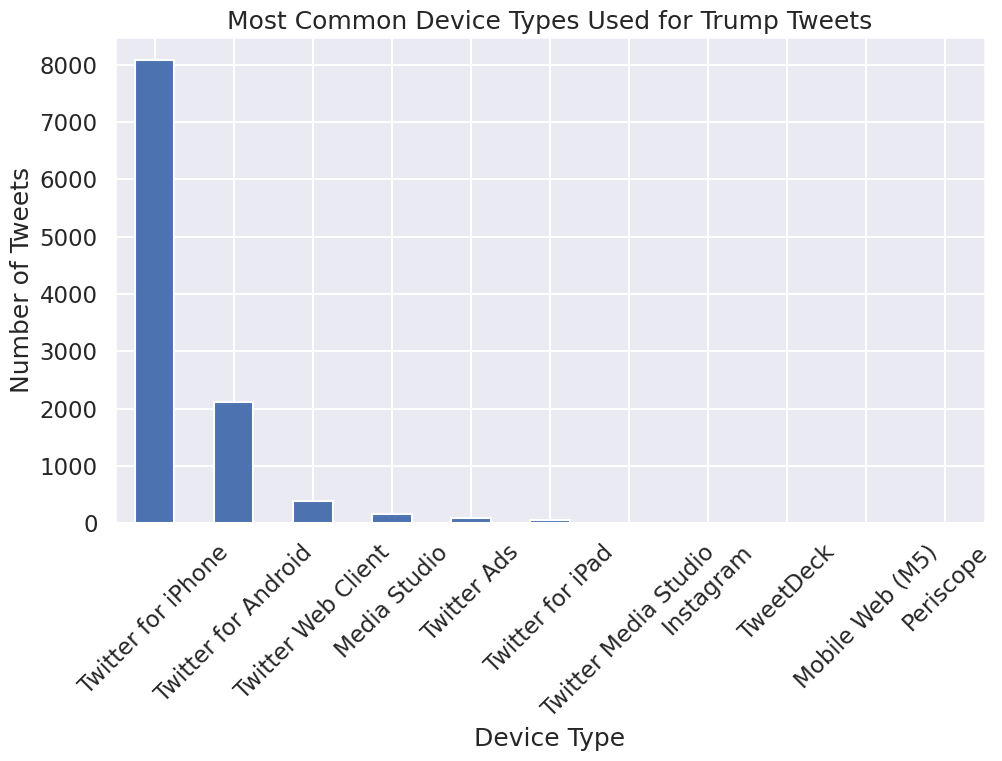

In [20]:
### BEGIN ANSWER
   
# Count the occurrences of each device
device_counts = df_trump['source'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
device_counts.sort_values(ascending=False).plot(kind='bar')
plt.title('Most Common Device Types Used for Trump Tweets')
plt.xlabel('Device Type')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.show()

### END ANSWER

### Task 3.4 - Devices
Is there a difference between his Tweet behavior across these devices? We will attempt to answer this question in our subsequent analysis.

First, we'll take a look at whether Trump's tweets from an Android come at different times than his tweets from an iPhone. Note that Twitter gives us his tweets in the [UTC timezone](https://www.wikiwand.com/en/List_of_UTC_time_offsets) (notice the `+0000` in the first few tweets)

**Note** - If your `time` column is not in datetime format, the following code will not work.

In [21]:
df_trump['time'][0:3]

id
682723973449289728   2016-01-01 00:44:14+00:00
682764544402440192   2016-01-01 03:25:27+00:00
682792967736848385   2016-01-01 05:18:23+00:00
Name: time, dtype: datetime64[ns, UTC]

We'll convert the tweet times to US Eastern Time, the timezone of New York and Washington D.C., since those are the places we would expect the most tweet activity from Trump.

In [22]:
df_trump['est_time'] = (
    df_trump['time'] # Set initial timezone to UTC
                 .dt.tz_convert("EST") # Convert to Eastern Time
)
df_trump.head()

,time,source,text,retweet_count,favorite_count,est_time
id,,,,,,
682723973449289728,2016-01-01 00:44:14+00:00,Twitter for Android,"I will be on @FoxNews live, with members of my family, at 11:50 P.M. We will ring in the New Year together! MAKE AMERICA GREAT AGAIN!",2108,6735,2015-12-31 19:44:14-05:00
682764544402440192,2016-01-01 03:25:27+00:00,Twitter for iPhone,HAPPY NEW YEAR &amp; THANK YOU! https://t.co/YO1Yi8QbZy https://t.co/uxUXWJ1Rbv,3460,8581,2015-12-31 22:25:27-05:00
682792967736848385,2016-01-01 05:18:23+00:00,Twitter for iPhone,#HappyNewYearAmerica! https://t.co/EeQb8PDrUe,3434,9143,2016-01-01 00:18:23-05:00
682805320217980929,2016-01-01 06:07:28+00:00,Twitter for iPhone,Happy New Year from #MarALago! Thank you to my great family for all of their support. https://t.co/6UsqSiaaj7,1948,8258,2016-01-01 01:07:28-05:00
682805477168779264,2016-01-01 06:08:06+00:00,Twitter for Android,"""@jallenaip: Hillary said she was in a ""Fog of War"" as explanation for the lies about Benghazi. No fog allowed in WH. Vote Trump POTUS!""",2721,7490,2016-01-01 01:08:06-05:00


**What you need to do:**

Add a column called `hour` to the `df_trump` table which contains the hour of the day as floating point number computed by:

$$
\text{hour} + \frac{\text{minute}}{60} + \frac{\text{second}}{60^2}
$$

In [23]:
# Add a column called 'hour' which contains the hour of the day as a floating point number
df_trump['hour'] = df_trump['est_time'].dt.hour + df_trump['est_time'].dt.minute / 60 + df_trump['est_time'].dt.second / 3600

# Adjust the 'hour' column so that 0 becomes 24
df_trump['hour'] = df_trump['hour'].replace(0, 24)

# Create 'roundhour' by rounding the 'hour' values
df_trump['roundhour'] = df_trump['hour'].apply(lambda x: np.floor(x) if x - np.floor(x) < 0.5 else np.ceil(x) % 24)

# Adjust 'roundhour' so that 0 becomes 24
df_trump['roundhour'] = df_trump['roundhour'].replace(0, 24)


Use the `roundhour` column and plot the number of tweets at every hour of the day.
Order the plot using the hour of the day (1 to 24). Use seaborn `countplot`

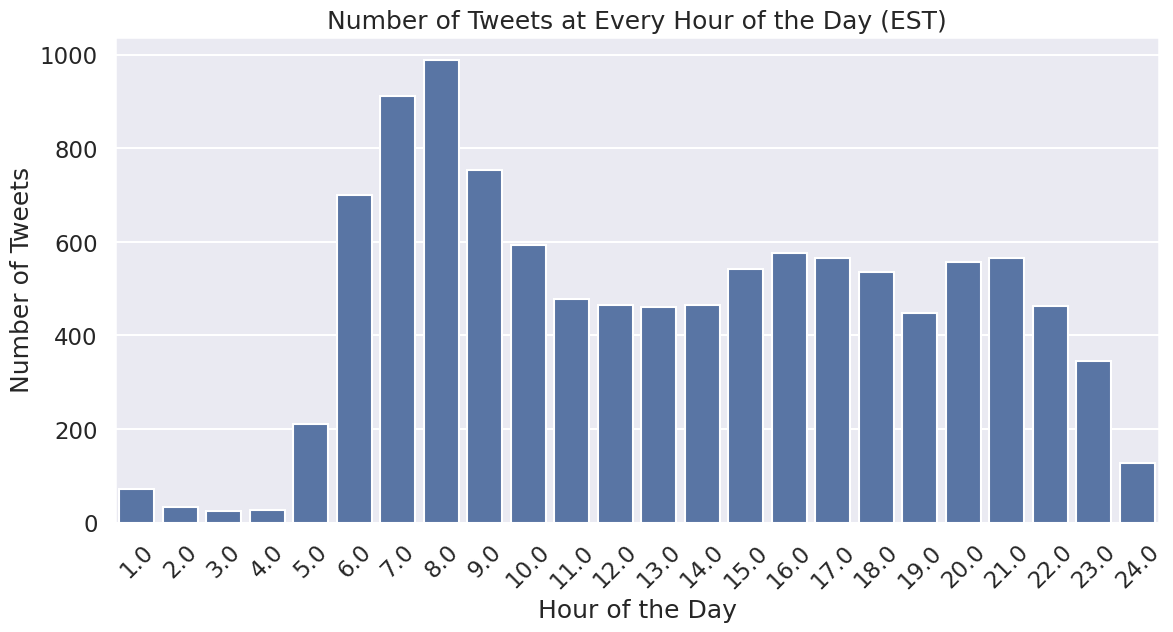

In [24]:
# make a bar plot here
### BEGIN ANSWER
   
plt.figure(figsize=(12, 6))
sns.countplot(x='roundhour', data=df_trump)
plt.title('Number of Tweets at Every Hour of the Day (EST)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.show()
### END ANSWER

Now, use this data along with the seaborn `distplot` function to examine the distribution over hours of the day in eastern time that trump tweets on each device for the 2 most commonly used devices.  Your plot should look somewhat similar to the following.

<img src="images/device_hour2.png" align="left" alt="Drawing" style="width: 400px;"/>


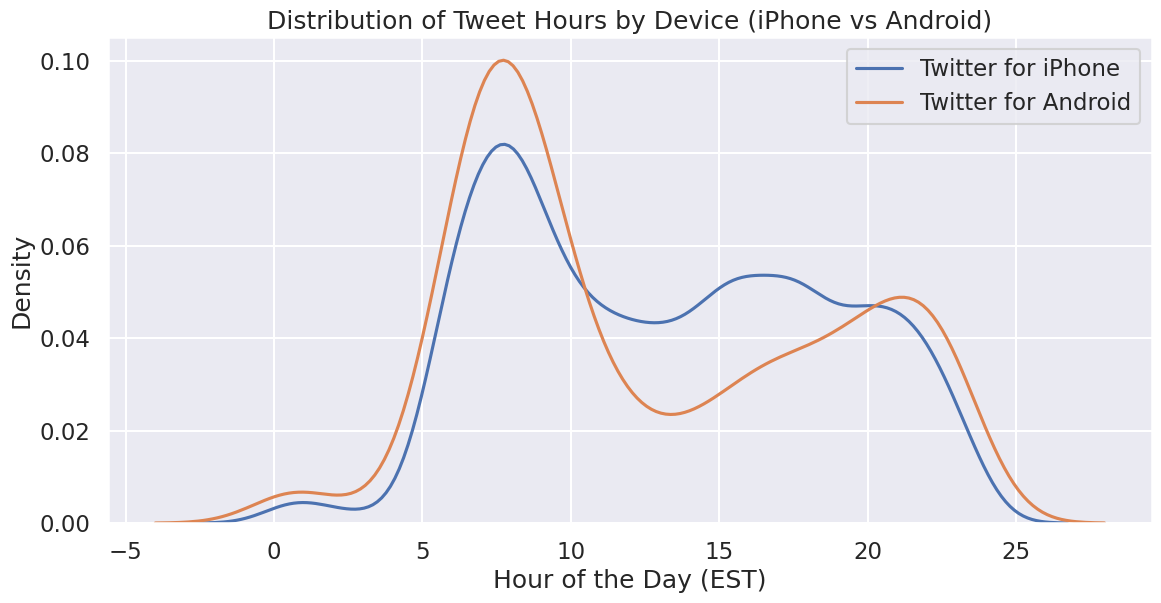

In [25]:
### BEGIN ANSWER
   
# KDE Plot
plt.figure(figsize=(12, 6))
for device in ['Twitter for iPhone', 'Twitter for Android']:
    subset = df_trump[df_trump['source'] == device]
    sns.kdeplot(subset['hour'], label=device)

plt.title('Distribution of Tweet Hours by Device (iPhone vs Android)')
plt.xlabel('Hour of the Day (EST)')
plt.ylabel('Density')
plt.legend()
plt.show()

### END ANSWER

### Task 3.5 iPhone or Android

According to [this Verge article](https://www.theverge.com/2017/3/29/15103504/donald-trump-iphone-using-switched-android), Donald Trump switched from an Android to an iPhone sometime in March 2017.

Create a figure identical to your figure from 3.4, except that you should show the results only from 2016. If you get stuck consider looking at the `year_fraction` function from the next problem.

Use this data along with the seaborn `distplot` function to examine the distribution over hours of the day in eastern time that trump tweets on each device for the 2 most commonly used devices.  Your plot should look somewhat similar to the following. 

During the campaign, it was theorized that Donald Trump's tweets from Android were written by him personally, and the tweets from iPhone were from his staff. Does your figure give support the theory?

**Your Response**: 


In 2016, the time allocation for the usage of the iphone centered in the afternoon, while his tweets from 2015 to present shows that he mostly tweets in the morning. It seems that the tweets from iphone in 2016 were from his staff, not himself.

\\
<img src="images/device_hour2.png" align="left" alt="Drawing" style="width: 600px;"/>


Number of tweets from 2016: 4223
Most common devices in 2016: Index(['Twitter for iPhone', 'Twitter for Android'], dtype='object', name='source')


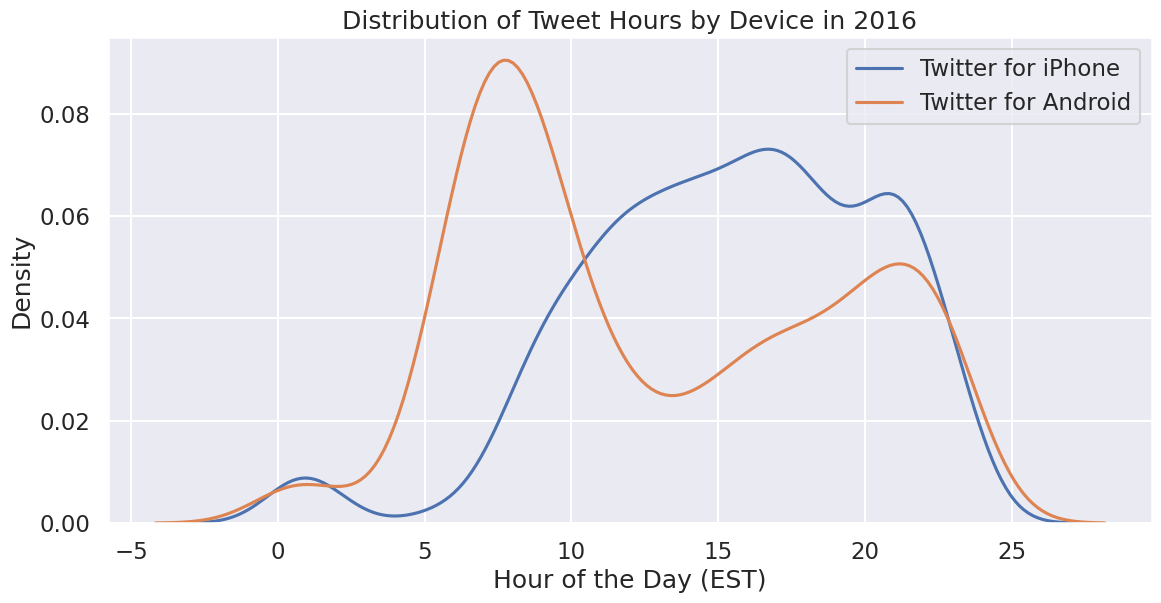

In [26]:
### BEGIN ANSWER
   
# Filter tweets from 2016
tweets_2016 = df_trump[df_trump['est_time'].dt.year == 2016]

# Check the number of tweets from 2016
print("Number of tweets from 2016:", len(tweets_2016))

# Determine the two most common devices used in 2016
common_devices_2016 = tweets_2016['source'].value_counts().nlargest(2).index
print("Most common devices in 2016:", common_devices_2016)

# Plot the distribution of tweet times for each device
plt.figure(figsize=(12, 6))
for device in common_devices_2016:
    subset = tweets_2016[tweets_2016['source'] == device]
    sns.kdeplot(subset['hour'], label=device)

plt.title('Distribution of Tweet Hours by Device in 2016')
plt.xlabel('Hour of the Day (EST)')
plt.ylabel('Density')
plt.legend()
plt.show()

### END ANSWER

### Task 3.6 Time of the day
* What time of the day the Android tweets were made by Trump himself? (eg: morning, late night etc). Just speculate based on data

* What time of the day the Android tweets were made by paid staff?

### Task 3.7 Device Analysis
Let's now look at which device he has used over the entire time period of this dataset.

To examine the distribution of dates we will convert the date to a fractional year that can be plotted as a distribution.

(Code borrowed from https://stackoverflow.com/questions/6451655/python-how-to-convert-datetime-dates-to-decimal-years)

In [27]:
import datetime

# Function to convert datetime to year fraction
def year_fraction(date):
    start = datetime.date(date.year, 1, 1).toordinal()
    year_length = datetime.date(date.year + 1, 1, 1).toordinal() - start
    return date.year + float(date.toordinal() - start) / year_length

# Apply the function to your DataFrame
df_trump['year'] = df_trump['time'].apply(year_fraction)


Use the `sns.distplot` to overlay the distributions of the 2 most frequently used web technologies over the years.  Your final plot should be similar to:

<img src="images/source_years.png" alt="Image" width="400" height="400" />

/tmp/ipykernel_664511/672152911.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(iph_Temp['year'], label = 'iPhone')
/tmp/ipykernel_664511/672152911.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(and_Temp['year'], label = 'Android')


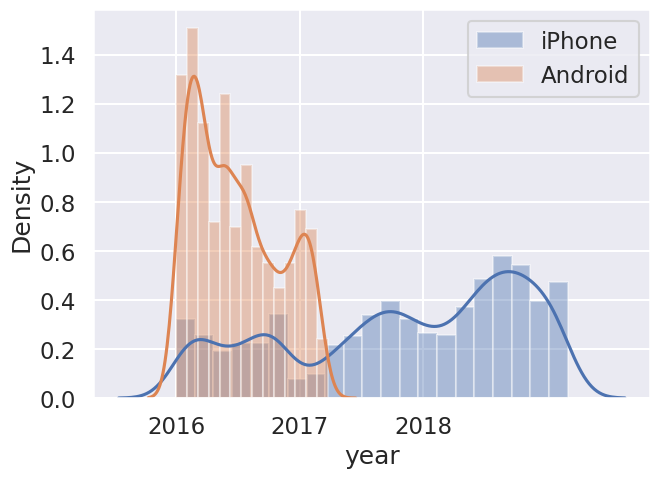

In [28]:
### BEGIN SOLUTION
trump_years = df_trump[['source', 'year']].set_index('source')
#trump_years

iph_Temp = trump_years.loc[trump_years.index == 'Twitter for iPhone']
#iph_Temp
and_Temp = trump_years.loc[trump_years.index == 'Twitter for Android']
#and_Temp

#code to plot
ax = sns.distplot(iph_Temp['year'], label = 'iPhone')
sns.distplot(and_Temp['year'], label = 'Android')
ax.set(xticks=(2016,2017,2018))
plt.legend()

### END SOLUTION


## PART 4 - Sentiment Analysis  (group/individual)

It turns out that we can use the words in Trump's tweets to calculate a measure of the sentiment of the tweet. For example, the sentence "I love America!" has positive sentiment, whereas the sentence "I hate taxes!" has a negative sentiment. In addition, some words have stronger positive / negative sentiment than others: "I love America." is more positive than "I like America."

We will use the [VADER (Valence Aware Dictionary and sEntiment Reasoner)](https://github.com/cjhutto/vaderSentiment) lexicon to analyze the sentiment of Trump's tweets. VADER is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media which is great for our usage.

The VADER lexicon gives the sentiment of individual words. Run the following cell to show the first few rows of the lexicon:

In [29]:
print(''.join(open("/srv/shared/vader_lexicon.txt").readlines()[:10]))

$:	-1.5	0.80623	[-1, -1, -1, -1, -3, -1, -3, -1, -2, -1]
%)	-0.4	1.0198	[-1, 0, -1, 0, 0, -2, -1, 2, -1, 0]
%-)	-1.5	1.43178	[-2, 0, -2, -2, -1, 2, -2, -3, -2, -3]
&-:	-0.4	1.42829	[-3, -1, 0, 0, -1, -1, -1, 2, -1, 2]
&:	-0.7	0.64031	[0, -1, -1, -1, 1, -1, -1, -1, -1, -1]
( '}{' )	1.6	0.66332	[1, 2, 2, 1, 1, 2, 2, 1, 3, 1]
(%	-0.9	0.9434	[0, 0, 1, -1, -1, -1, -2, -2, -1, -2]
('-:	2.2	1.16619	[4, 1, 4, 3, 1, 2, 3, 1, 2, 1]
(':	2.3	0.9	[1, 3, 3, 2, 2, 4, 2, 3, 1, 2]
((-:	2.1	0.53852	[2, 2, 2, 1, 2, 3, 2, 2, 3, 2]



### Task 4.1 Polarities

As you can see, the lexicon contains emojis too! The first column of the lexicon is the *token*, or the word itself. The second column is the *polarity* of the word, or how positive / negative it is.

**Question** How did they decide the polarities of these words? What are the other two columns in the lexicon? (See the link above.)

 Read in the lexicon into a DataFrame called `df_sent`. The index of the DF should be the tokens in the lexicon. `df_sent` should have one column: `polarity`: The polarity of each token.

In [30]:
### BEGIN ANSWER
lexicon_file = "/srv/shared/vader_lexicon.txt"

# Initialize an empty list to store the lexicon data
lexicon = []

# Open the file and read line by line
with open(lexicon_file, 'r') as file:
    for line in file:
        # Split each line into parts using the tab delimiter
        parts = line.strip().split('\t')
        # The first part is the token
        token = parts[0]
        # The second part is the polarity score, converted to float
        polarity = float(parts[1])
        # Append the token and polarity score to the lexicon list
        lexicon.append([token, polarity])

# Create the DataFrame from the lexicon list
df_sent = pd.DataFrame(lexicon, columns=['token', 'polarity']).set_index('token')

# Display the first few rows of the DataFrame
df_sent.head()


### END ANSWER

,polarity
token,
$:,-1.5
%),-0.4
%-),-1.5
&-:,-0.4
&:,-0.7


### Task 4.2 Sentiment

Now, let's use this lexicon to calculate the overall sentiment for each of Trump's tweets. Here's the basic idea:

1. For each tweet, find the sentiment of each word.
2. Calculate the sentiment of each tweet by taking the sum of the sentiments of its words.

Be sure to lowercase the text in the tweets since the lexicon is also lowercase. Set the `text` column of the `df_trump` DF to be the lowercased text of each tweet.

In [31]:
### BEGIN ANSWER
   
# Lowercasing the text in tweets
df_trump['text'] = df_trump['text'].str.lower()

# Function to calculate sentiment of a tweet
def tweet_sentiment(tweet, lexicon):
    # Tokenize the tweet into words
    words = tweet.split()
    # Sum the sentiment scores of each word
    sentiment = sum(lexicon.get(word, 0) for word in words)
    return sentiment

# Calculate sentiment for each tweet
df_trump['sentiment'] = df_trump['text'].apply(lambda x: tweet_sentiment(x, df_sent['polarity']))

# Display the DataFrame with sentiments
df_trump.head()

    
    
    
    
### END ANSWER

,time,source,text,retweet_count,favorite_count,est_time,hour,roundhour,year,sentiment
id,,,,,,,,,,
682723973449289728,2016-01-01 00:44:14+00:00,Twitter for Android,"i will be on @foxnews live, with members of my family, at 11:50 p.m. we will ring in the new year together! make america great again!",2108,6735,2015-12-31 19:44:14-05:00,19.737222,20.0,2016.0,3.1
682764544402440192,2016-01-01 03:25:27+00:00,Twitter for iPhone,happy new year &amp; thank you! https://t.co/yo1yi8qbzy https://t.co/uxuxwj1rbv,3460,8581,2015-12-31 22:25:27-05:00,22.424167,22.0,2016.0,4.2
682792967736848385,2016-01-01 05:18:23+00:00,Twitter for iPhone,#happynewyearamerica! https://t.co/eeqb8pdrue,3434,9143,2016-01-01 00:18:23-05:00,0.306389,24.0,2016.0,0
682805320217980929,2016-01-01 06:07:28+00:00,Twitter for iPhone,happy new year from #maralago! thank you to my great family for all of their support. https://t.co/6usqsiaaj7,1948,8258,2016-01-01 01:07:28-05:00,1.124444,1.0,2016.0,7.3
682805477168779264,2016-01-01 06:08:06+00:00,Twitter for Android,"""@jallenaip: hillary said she was in a ""fog of war"" as explanation for the lies about benghazi. no fog allowed in wh. vote trump potus!""",2721,7490,2016-01-01 01:08:06-05:00,1.135000,1.0,2016.0,-3.0


### Task 4.3 punctuations

Now, let's get rid of punctuation since it'll cause us to fail to match words. Create a new column called `no_punc` in the `df_trump` to be the lowercased text of each tweet with all punctuation replaced by a single space. We consider punctuation characters to be any character that isn't a Unicode word character or a whitespace character. You may want to consult the Python documentation on regexes for this problem.


In [32]:
### BEGIN ANSWER
   
# Replace punctuation with a single space
# Regular expression for finding punctuation
punct_re = r'[^\w\s]'
df_trump['no_punc'] = df_trump['text'].str.replace(punct_re, ' ', regex=True)

# Display the updated DataFrame
df_trump.head()

### END ANSWER

,time,source,text,retweet_count,favorite_count,est_time,hour,roundhour,year,sentiment,no_punc
id,,,,,,,,,,,
682723973449289728,2016-01-01 00:44:14+00:00,Twitter for Android,"i will be on @foxnews live, with members of my family, at 11:50 p.m. we will ring in the new year together! make america great again!",2108,6735,2015-12-31 19:44:14-05:00,19.737222,20.0,2016.0,3.1,i will be on foxnews live with members of my family at 11 50 p m we will ring in the new year together make america great again
682764544402440192,2016-01-01 03:25:27+00:00,Twitter for iPhone,happy new year &amp; thank you! https://t.co/yo1yi8qbzy https://t.co/uxuxwj1rbv,3460,8581,2015-12-31 22:25:27-05:00,22.424167,22.0,2016.0,4.2,happy new year amp thank you https t co yo1yi8qbzy https t co uxuxwj1rbv
682792967736848385,2016-01-01 05:18:23+00:00,Twitter for iPhone,#happynewyearamerica! https://t.co/eeqb8pdrue,3434,9143,2016-01-01 00:18:23-05:00,0.306389,24.0,2016.0,0,happynewyearamerica https t co eeqb8pdrue
682805320217980929,2016-01-01 06:07:28+00:00,Twitter for iPhone,happy new year from #maralago! thank you to my great family for all of their support. https://t.co/6usqsiaaj7,1948,8258,2016-01-01 01:07:28-05:00,1.124444,1.0,2016.0,7.3,happy new year from maralago thank you to my great family for all of their support https t co 6usqsiaaj7
682805477168779264,2016-01-01 06:08:06+00:00,Twitter for Android,"""@jallenaip: hillary said she was in a ""fog of war"" as explanation for the lies about benghazi. no fog allowed in wh. vote trump potus!""",2721,7490,2016-01-01 01:08:06-05:00,1.135000,1.0,2016.0,-3.0,jallenaip hillary said she was in a fog of war as explanation for the lies about benghazi no fog allowed in wh vote trump potus


**Question** Why don't we simply remove punctuation instead of replacing with a space? See if you can figure this out by looking at the tweet data.S

In [33]:
assert isinstance(punct_re, str)
assert re.search(punct_re, 'this') is None
assert re.search(punct_re, 'this is ok') is None
assert re.search(punct_re, 'this is\nok') is None
assert re.search(punct_re, 'this is not ok.') is not None
assert re.search(punct_re, 'this#is#ok') is not None
assert re.search(punct_re, 'this^is ok') is not None
assert df_trump['no_punc'].loc[800329364986626048] == 'i watched parts of  nbcsnl saturday night live last night  it is a totally one sided  biased show   nothing funny at all  equal time for us '
assert df_trump['text'].loc[884740553040175104] == 'working hard to get the olympics for the united states (l.a.). stay tuned!'


### Task 4.4 Tidy Format


Now, let's convert the tweets into what's called a [*tidy format*](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html) to make the sentiments easier to calculate. Use the `no_punc` column of `df_trump` to create a table called `tidy_format`. The index of the table should be the IDs of the tweets, repeated once for every word in the tweet. It has two columns:

1. `num`: The location of the word in the tweet. For example, if the tweet was "i love america", then the location of the word "i" is 0, "love" is 1, and "america" is 2.
2. `word`: The individual words of each tweet.

The first few rows of our `tidy_format` table look like:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>num</th>
      <th>word</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>894661651760377856</th>
      <td>0</td>
      <td>i</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>1</td>
      <td>think</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>2</td>
      <td>senator</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>3</td>
      <td>blumenthal</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>4</td>
      <td>should</td>
    </tr>
  </tbody>
</table>

You can double check that your tweet with ID `894661651760377856` has the same rows as ours. Our tests don't check whether your table looks exactly like ours.

As usual, try to avoid using any for loops. Our solution uses a chain of 5 methods on the 'trump' DF, albeit using some rather advanced Pandas hacking.

* **Hint 1:** Try looking at the `expand` argument to pandas' `str.split`.

* **Hint 2:** Try looking at the `stack()` method.

* **Hint 3:** Try looking at the `level` parameter of the `reset_index` method.

In [34]:
#tidy_format = ...

### BEGIN ANSWER
   
# Step 1: Split the tweets into words
words = df_trump['no_punc'].str.split(expand=True)

# Step 2: Stack the DataFrame to create a Series with a multi-level index
stacked_words = words.stack()

# Step 3: Reset the index to get the desired tidy format
tidy_format = stacked_words.reset_index(level=1)
tidy_format.columns = ['num', 'word']

tidy_format.head()

### END ANSWER

,num,word
id,,
682723973449289728,0,i
682723973449289728,1,will
682723973449289728,2,be
682723973449289728,3,on
682723973449289728,4,foxnews


In [35]:
print("Number of rows in tidy_format:", len(tidy_format))

Number of rows in tidy_format: 271930


In [36]:
assert tidy_format.loc[894661651760377856].shape == (27, 2)
assert ' '.join(list(tidy_format.loc[894661651760377856]['word'])) == 'i think senator blumenthal should take a nice long vacation in vietnam where he lied about his service so he can at least say he was there'

### Task 4.5 Polrity Column

Now that we have this table in the tidy format, it becomes much easier to find the sentiment of each tweet: we can join the table with the lexicon table. 

Add a `polarity` column to the `df_trump` table.  The `polarity` column should contain the sum of the sentiment polarity of each word in the text of the tweet.

**Hint** you will need to merge the `tidy_format` and `df_sent` tables and group the final answer.


In [37]:
#df_trump['polarity'] = ...

### BEGIN ANSWER
   
# Step 1: Merge tidy_format with df_sent to get polarity of each word
merged = tidy_format.merge(df_sent, left_on='word', right_index=True, how='left')

# Step 2: Group by tweet ID and sum the polarities
tweet_polarity = merged.groupby(merged.index).sum()

# Step 3: Join the sum back to df_trump
df_trump['polarity'] = df_trump.index.map(tweet_polarity['polarity'])

### END ANSWER
df_trump

,time,source,text,retweet_count,favorite_count,est_time,hour,roundhour,year,sentiment,no_punc,polarity
id,,,,,,,,,,,,
682723973449289728,2016-01-01 00:44:14+00:00,Twitter for Android,"i will be on @foxnews live, with members of my family, at 11:50 p.m. we will ring in the new year together! make america great again!",2108,6735,2015-12-31 19:44:14-05:00,19.737222,20.0,2016.000000,3.1,i will be on foxnews live with members of my family at 11 50 p m we will ring in the new year together make america great again,3.1
682764544402440192,2016-01-01 03:25:27+00:00,Twitter for iPhone,happy new year &amp; thank you! https://t.co/yo1yi8qbzy https://t.co/uxuxwj1rbv,3460,8581,2015-12-31 22:25:27-05:00,22.424167,22.0,2016.000000,4.2,happy new year amp thank you https t co yo1yi8qbzy https t co uxuxwj1rbv,4.2
682792967736848385,2016-01-01 05:18:23+00:00,Twitter for iPhone,#happynewyearamerica! https://t.co/eeqb8pdrue,3434,9143,2016-01-01 00:18:23-05:00,0.306389,24.0,2016.000000,0,happynewyearamerica https t co eeqb8pdrue,0.0
682805320217980929,2016-01-01 06:07:28+00:00,Twitter for iPhone,happy new year from #maralago! thank you to my great family for all of their support. https://t.co/6usqsiaaj7,1948,8258,2016-01-01 01:07:28-05:00,1.124444,1.0,2016.000000,7.3,happy new year from maralago thank you to my great family for all of their support https t co 6usqsiaaj7,9.0
682805477168779264,2016-01-01 06:08:06+00:00,Twitter for Android,"""@jallenaip: hillary said she was in a ""fog of war"" as explanation for the lies about benghazi. no fog allowed in wh. vote trump potus!""",2721,7490,2016-01-01 01:08:06-05:00,1.135000,1.0,2016.000000,-3.0,jallenaip hillary said she was in a fog of war as explanation for the lies about benghazi no fog allowed in wh vote trump potus,-5.9
...,...,...,...,...,...,...,...,...,...,...,...,...
1101856883634302976,2019-03-02 14:48:47+00:00,Twitter for iPhone,rt @realdonaldtrump: since my election as president the dow jones is up 43% and the nasdaq composite almost 50%. great news for your 401(k)…,24511,0,2019-03-02 09:48:47-05:00,9.813056,10.0,2019.164384,3.1,rt realdonaldtrump since my election as president the dow jones is up 43 and the nasdaq composite almost 50 great news for your 401 k,3.1
1101857408001949696,2019-03-02 14:50:52+00:00,Twitter for iPhone,rt @realdonaldtrump: i hope our great republican senators don’t get led down the path of weak and ineffective border security. without stro…,27707,0,2019-03-02 09:50:52-05:00,9.847778,10.0,2019.164384,2.6,rt realdonaldtrump i hope our great republican senators don t get led down the path of weak and ineffective border security without stro,4.0
1101857665037287425,2019-03-02 14:51:53+00:00,Twitter for iPhone,rt @realdonaldtrump: 93% approval rating in the republican party. 52% approval rating overall! not bad considering i get the most unfair (b…,34498,0,2019-03-02 09:51:53-05:00,9.864722,10.0,2019.164384,-0.4,rt realdonaldtrump 93 approval rating in the republican party 52 approval rating overall not bad considering i get the most unfair b,1.3


In [38]:
assert np.allclose(df_trump.loc[744701872456536064, 'polarity'], 8.4)
assert np.allclose(df_trump.loc[745304731346702336, 'polarity'], 2.5)
assert np.allclose(df_trump.loc[744519497764184064, 'polarity'], 1.7)
assert np.allclose(df_trump.loc[894661651760377856, 'polarity'], 0.2)
assert np.allclose(df_trump.loc[894620077634592769, 'polarity'], 5.4)
# If you fail this test, you dropped tweets with 0 polarity
#assert np.allclose(df_trump.loc[744355251365511169, 'polarity'], 0.0)


### Task 4.6 Most Positive and Negative Tweets
Now we have a measure of the sentiment of each of his tweets! You can read over the VADER readme to understand a more robust sentiment analysis.
Now, write the code to see the 20 most positive and most 20 negative tweets from Trump in your dataset:
Find the most negative and most positive tweets made by Trump

In [39]:
print('Most negative tweets:')

### BEGIN ANSWER
   
print(df_trump.sort_values('polarity').head(20)['text'])

### END ANSWER

Most negative tweets:
id
1084649448003784704    the trump portrait of an unsustainable border crisis is dead on. “in the last two years, ice officers made 266,000 arrests of aliens with criminal records, including those charged or convicted of 100,000 assaults, 30,000 sex crimes &amp; 4000 violent killings.” america’s sout...
1031590431379865600     it is outrageous that poisonous synthetic heroin fentanyl comes pouring into the u.s. postal system from china. we can, and must, end this now! the senate should pass the stop act – and firmly stop this poison from killing our children and destroying our country. no more delay!
1029731513573822464             the rigged russian witch hunt goes on and on as the “originators and founders” of this scam continue to be fired and demoted for their corrupt and illegal activity. all credibility is gone from this terrible hoax, and much more will be lost as it proceeds. no collusion!
1056299897882923009                                               

In [40]:
print('Most positive tweets:')

### BEGIN ANSWER
   
print(df_trump.sort_values('polarity', ascending=False).head(20)['text'])

### END ANSWER

Most positive tweets:
id
983143317889323008                                                                     congratulations to patrick reed on his great and courageous masters win! when patrick had his amazing win at doral 5 years ago, people saw his great talent, and a bright future ahead. now he is the masters champion!
1082648785312976896     congratulations to a truly great football team, the clemson tigers, on an incredible win last night against a powerful alabama team. a big win also for the great state of south carolina. look forward to seeing the team, and their brilliant coach, for the second time at the w.h.
1007974129474121728     my supporters are the smartest, strongest, most hard working and most loyal that we have seen in our countries history. it is a beautiful thing to watch as we win elections and gather support from all over the country. as we get stronger, so does our country. best numbers ever!
1016638035281219584    thank you to all of my great supporters, re

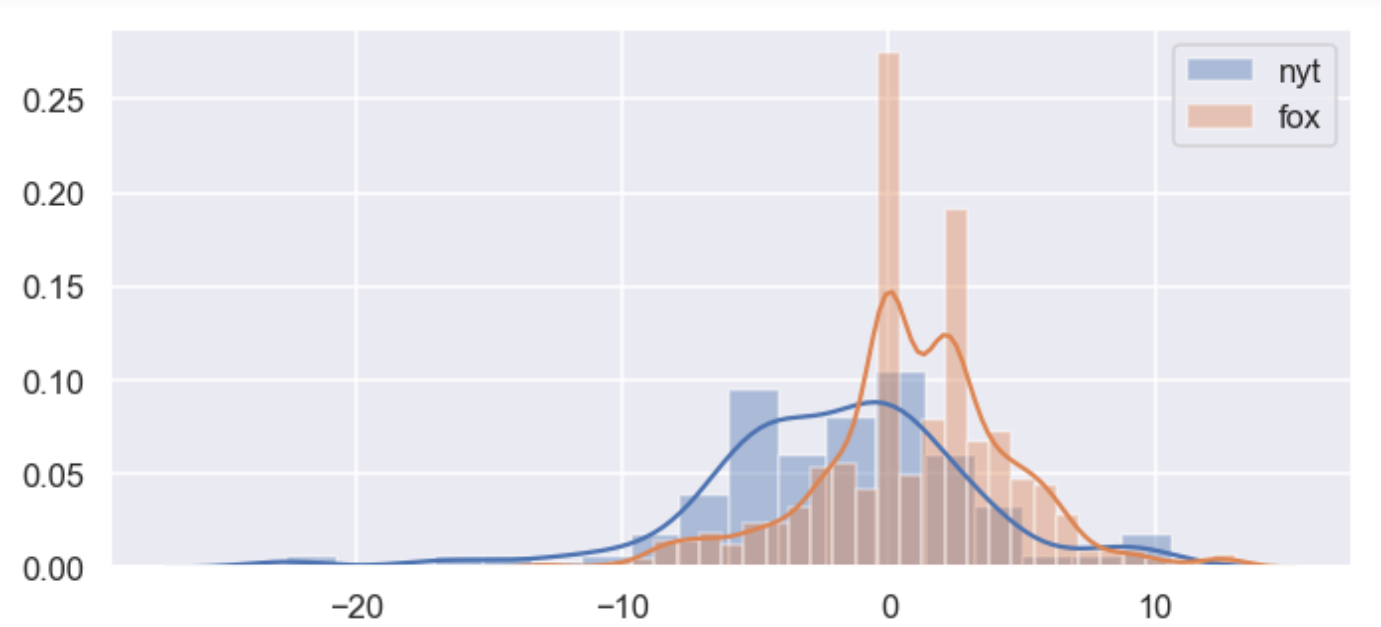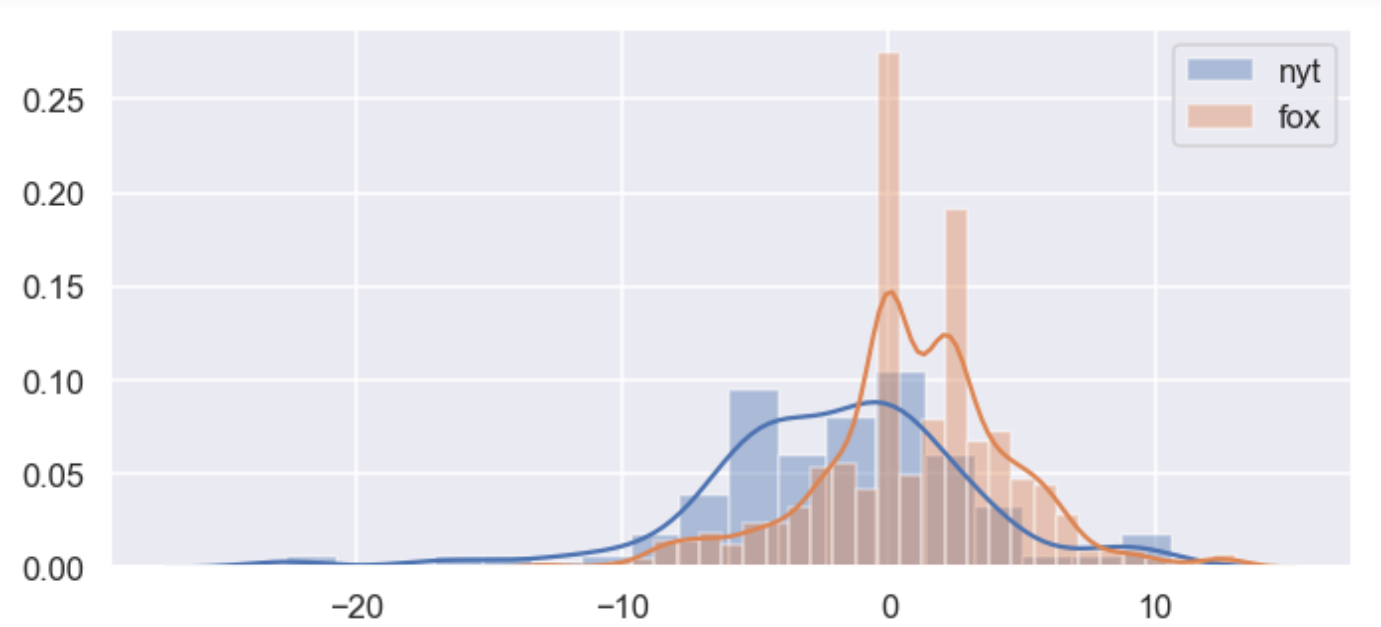### Task 4.7  NYT vs FOX
Plot the distribution of tweet sentiments broken down by whether the text of the tweet contains `nyt` or `fox`.  Then in the box below comment on what we observe?

<img src="images/nyt_vs_fox.png" alt="Image" width="500" height="900" />

/tmp/ipykernel_664511/1940525758.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df_nyt, label = 'nyt')
/tmp/ipykernel_664511/1940525758.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_fox, label = 'fox')


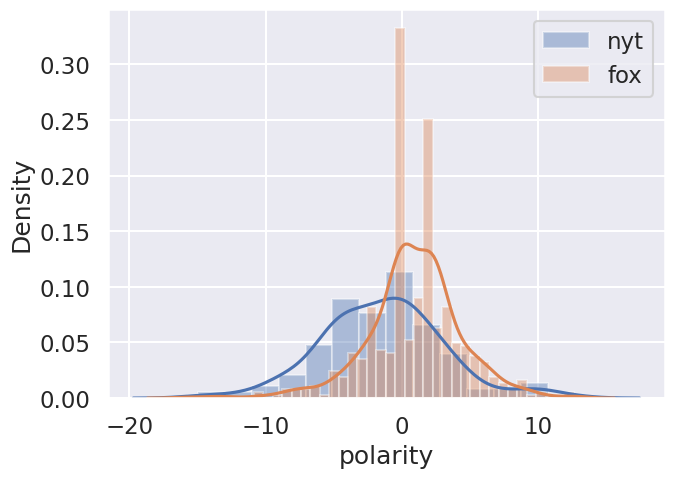

In [41]:
### BEGIN ANSWER
   
### BEGIN SOLUTION
df_nyt = df_trump[df_trump['no_punc'].str.contains('nyt')]['polarity']
df_fox = df_trump[df_trump['no_punc'].str.contains('fox')]['polarity']

#df_nyt
#df_fox

#plotting 
ax = sns.distplot(df_nyt, label = 'nyt')
sns.distplot(df_fox, label = 'fox')
plt.legend()



### END ANSWER

##### Comment on what you observe:

## PART 5 - Principal Component Analysis (PCA) and Twitter  (group and individual)
A look at the top words used and the sentiments expressed in Trump tweets indicates that, some words are used with others almost all the time. A notable example is the slogan like **Make America Great Again**. As such, it may be beneficial to look at groups of words rather than individual words. For that, we will look at an approach applying a Principal Component Analysis. 

### The PCA
The Principal Component Analysis, or PCA, is a tool generally used to identify patterns and to reduce the number of variables you have to consider in your analysis. For example, if you have data with 200 columns, it may be that a significant amount of the variance in your data can be explained by just 100 principal components. In the PCA, the first component is chosen in such a way that has the largest variance, subsequent components are orthogonal and continue covering as much variance as possible. In this way, the PCA samples as much of the variability in the data set with the first few components. Mathematically, each component is a linear combination of all the input parameters times coefficients specific for that component. These coefficients, or loading factors, are constrained such that the sum of the squares of them are equal to 1. As such, the loading factors serve as weights describing how strongly certain parameters contribute to the specific principal component. Parameters with large values of positive or negative loading factors are correlated with each other, which can serve to identify trends in your data.

### Task 5.1 Cleaning up the Data
Using NLTK (Natural Language Toolkit) package for language processing and other python libraries, parse the json file to deal with inflected words, such as plurals, and removed stop words like common English words (the, and, it, etc) and certain political terms (the candidates names, for example). You can start with the top 50 words, but full analysis may require large number of words.
Create a document-frequecy (df) matrix with 5000 rows and 50 columns where each column is a particular word (feature) and each row is a tweet (observation). The values of the matrix is how often the word appears. Apply the techniques we learned to reduce the weight of most common words (if necessary). Since this is a sparse matrix, you can use the sparse martix libraries to make things a bit more efficient (we can also use a regular numpy arrays to store these things since the dimensions are not too large). See demo notes books and lecture slides for some sparse matrix methods.
Print the first 10 rows of the df to show the matrix you created

Start with the `tidy_format` dataframe

In [42]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [43]:
import nltk
nltk.download('punkt')
nltk.download('omw-1.4')


[nltk_data] Downloading package punkt to /home/dtd72/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/dtd72/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [44]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.stem import WordNetLemmatizer

# Make sure NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Additional stop words as per the instructions
additional_stopwords = ['rt', 't', 'co', 'https', 'realdonaldtrump', 'amp', 'u',
                        'hillary', 'trump2016', 'trump', 'clinton', 'http', 'ha', 'wa']

# Define stop words
stop_words = set(nltk.corpus.stopwords.words('english')).union(additional_stopwords)

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Define preprocessing function
def preprocess(word):
    # Remove words that are numbers or contain numbers
    if word.isnumeric() or any(char.isdigit() for char in word):
        return None
    # Remove words with length of 1 or 2
    if len(word) <= 2:
        return None
    # Convert to lowercase
    word = word.lower()
    # Lemmatize and remove plurals
    word = lemmatizer.lemmatize(word)
    # Remove stopwords
    if word in stop_words:
        return None
    return word

# Assuming tidy_format is your DataFrame with 'num' and 'word' columns
# Apply preprocessing
tidy_format['word'] = tidy_format['word'].apply(preprocess)

# Remove rows with None values
tidy_format = tidy_format.dropna(subset=['word'])

# Assuming tidy_format index is sorted by tweet ID and starts from 0
# Select the first 5000 tweets based on unique tweet IDs
first_5000_tweet_ids = tidy_format.index.unique()[:5000]
tmp = tidy_format.loc[first_5000_tweet_ids]

# Get word counts for the top 50 words
word_counts = tmp['word'].value_counts().head(50)

# Create CountVectorizer with the top 50 words
vectorizer = CountVectorizer(vocabulary=word_counts.index)

# Create the document-frequency matrix
X = vectorizer.fit_transform(tmp['word'])

# Create the document-frequency matrix as a DataFrame
df_matrix = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Display the first 10 rows
print(df_matrix.head(10))


[nltk_data] Downloading package punkt to /home/dtd72/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/dtd72/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/dtd72/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/dtd72/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


   great  thank  america  people  make  makeamericagreatagain  new  get  \
0      0      0        0       0     0                      0    0    0   
1      0      0        0       0     0                      0    0    0   
2      0      0        0       0     0                      0    0    0   
3      0      0        0       0     0                      0    0    0   
4      0      0        0       0     0                      0    0    0   
5      0      0        0       0     0                      0    1    0   
6      0      0        0       0     0                      0    0    0   
7      0      0        0       0     0                      0    0    0   
8      0      0        0       0     1                      0    0    0   
9      0      0        1       0     0                      0    0    0   

   crooked  job  ...  last  tomorrow  let  day  support  maga  foxnews  say  \
0        0    0  ...     0         0    0    0        0     0        1    0   
1        0    0 

In [45]:
# Assuming word_counts is a Series with the top 50 words as the index
print("Top 50 words:")
for word in word_counts.index:
    print(word)


Top 50 words:
great
thank
america
people
make
makeamericagreatagain
new
get
crooked
job
vote
today
big
president
time
cruz
poll
join
country
medium
would
american
one
going
never
like
tonight
state
many
debate
win
bad
want
cnn
back
ted
watch
year
obama
said
last
tomorrow
let
day
support
maga
foxnews
say
enjoy
night


In [46]:
print(all_tweets.shape)  

(10913, 33)


### Task 5.2 Find the PCA's
Write the code to find the first 50 PCA's for the document-frequency matrix. Pass the document-term-matrix to scikit-learn’s (https://scikit-learn.org/stable/modules/decomposition.html#decompositions) PCA method to obtain the components and loading factors.

In [47]:
from sklearn.decomposition import PCA

# Assuming df_matrix is the document-frequency matrix with shape (5000, 50)
# Initialize PCA with the number of components you want to compute
pca = PCA(n_components=50)

# Fit PCA on the document-frequency matrix
# The fit method computes the loading scores and "explained variance"
pca.fit(df_matrix)

# Transform the df_matrix to get the principal components
# The transform method applies the rotation and dimensionality reduction
principal_components = pca.transform(df_matrix)

# Convert the principal components into a DataFrame for easier viewing
principal_components_df = pd.DataFrame(principal_components)

# Display the first few rows of the principal components DataFrame
print(principal_components_df.head())

# Additionally, let's look at the explained variance ratio which will tell us how much information 
# each principal component holds
print(pca.explained_variance_ratio_)


         0         1         2         3         4         5         6   \
0 -0.013541 -0.020456 -0.003007 -0.012716 -0.007984 -0.008404 -0.009262   
1 -0.011301 -0.016841 -0.001937 -0.008130 -0.004699 -0.004785 -0.005109   
2 -0.011301 -0.016841 -0.001937 -0.008130 -0.004699 -0.004785 -0.005109   
3 -0.011301 -0.016841 -0.001937 -0.008130 -0.004699 -0.004785 -0.005109   
4 -0.011301 -0.016841 -0.001937 -0.008130 -0.004699 -0.004785 -0.005109   

         7         8         9   ...            40        41        42  \
0 -0.008122 -0.004560 -0.009737  ... -3.358702e-15 -0.113474 -0.111793   
1 -0.004253 -0.002284 -0.004822  ... -1.049003e-16 -0.003789 -0.002410   
2 -0.004253 -0.002284 -0.004822  ... -1.049003e-16 -0.003789 -0.002410   
3 -0.004253 -0.002284 -0.004822  ... -1.049003e-16 -0.003789 -0.002410   
4 -0.004253 -0.002284 -0.004822  ... -1.049003e-16 -0.003789 -0.002410   

         43            44            45        46        47        48  \
0 -0.252470  8.162314e-01 -2.08

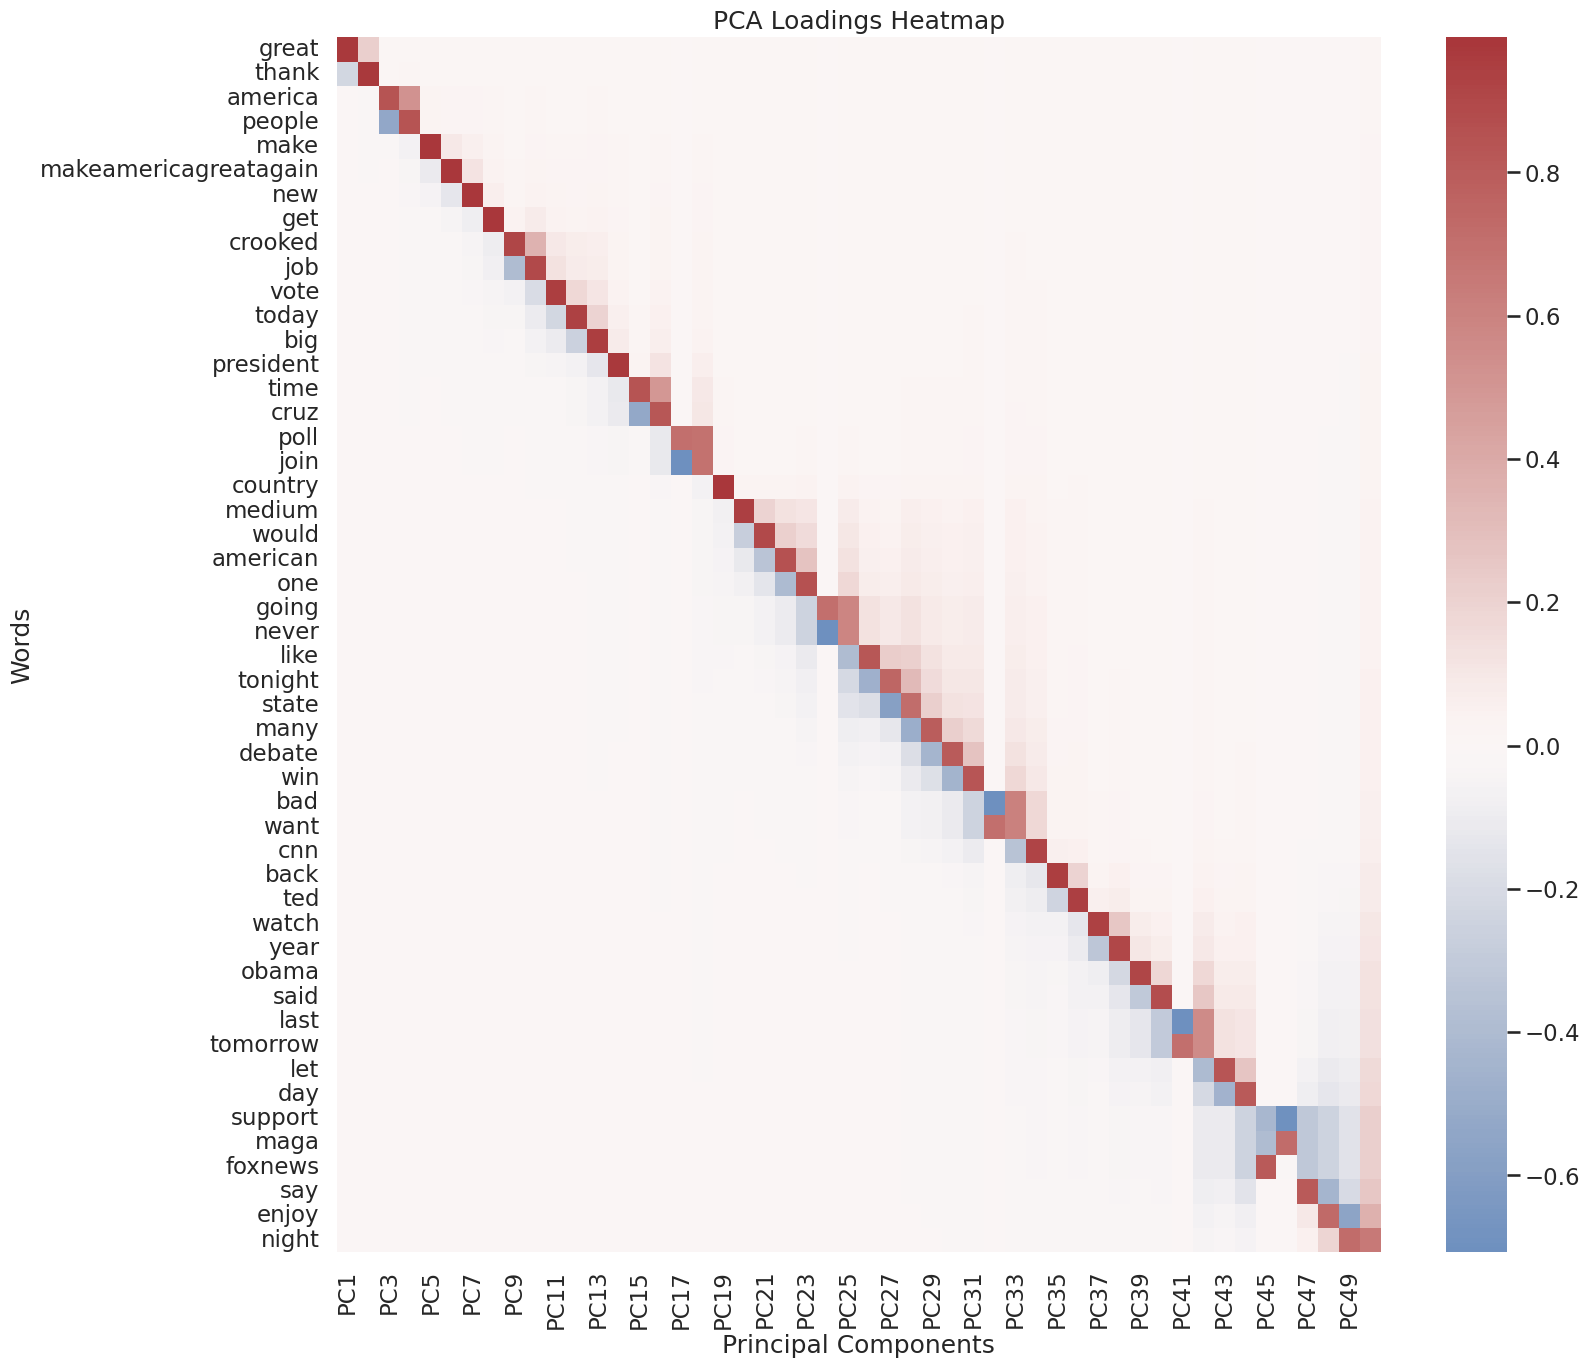

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Apply PCA on the df_matrix
pca = PCA(n_components=50)
pca.fit(df_matrix)

# Extract the PCA loadings
loadings = pca.components_

# Create a DataFrame for the loadings with the correct indexing
loadings_df = pd.DataFrame(loadings.T, index=vectorizer.get_feature_names_out(), columns=[f'PC{i+1}' for i in range(loadings.shape[0])])

# Plot the heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(loadings_df, cmap='vlag', center=0)
plt.title('PCA Loadings Heatmap')
plt.xlabel('Principal Components')
plt.ylabel('Words')
plt.show()


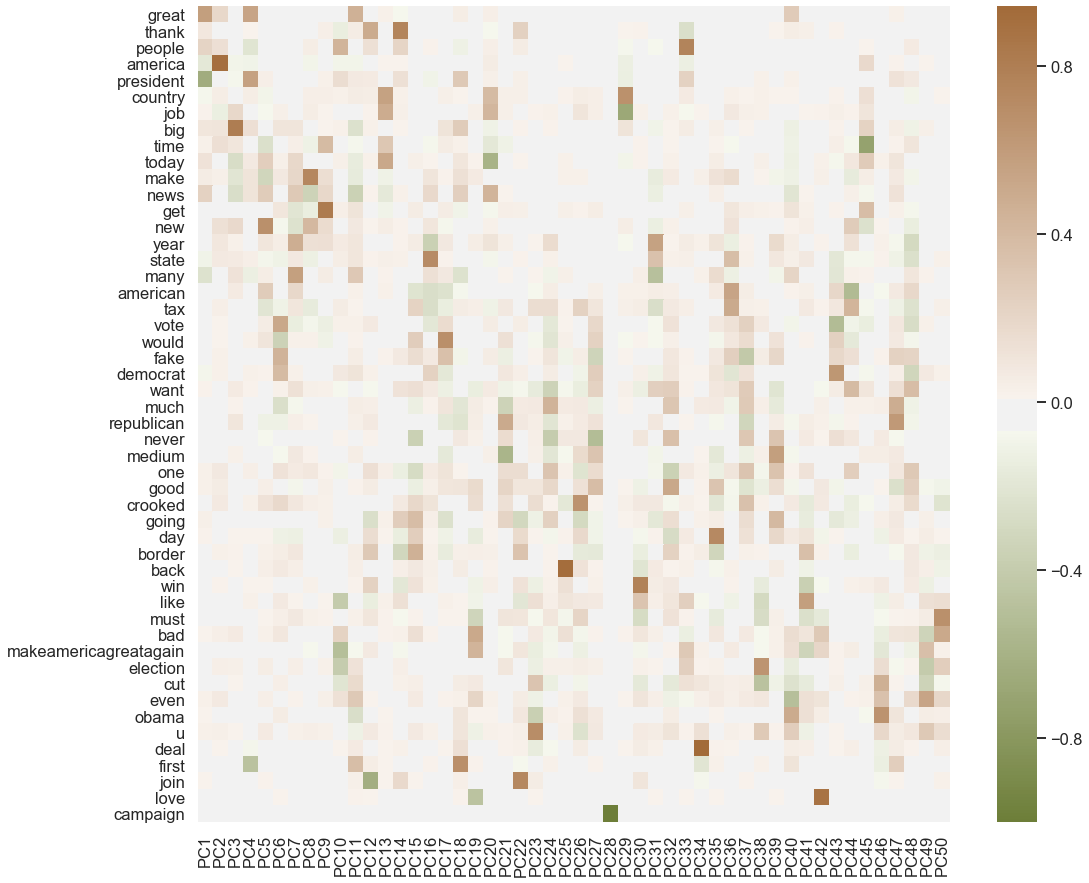

### Task 5.3 Examine the PCA
We can examine the PCA results to look at the heatmap. Make a grid plot which shows the various principal component along the x-axis and the individual words along the y-axes. Each grid box should be color-coded based on the sign of the loading factor and how large the square of that value is. Looking at it vertically, you can see which words constitute your principal components. Looking at it horizontally, you can see how individual terms are shared between components. Your answer will look closer to this.

<img src="images/pca.png" alt="Image" width="900" height="900" />

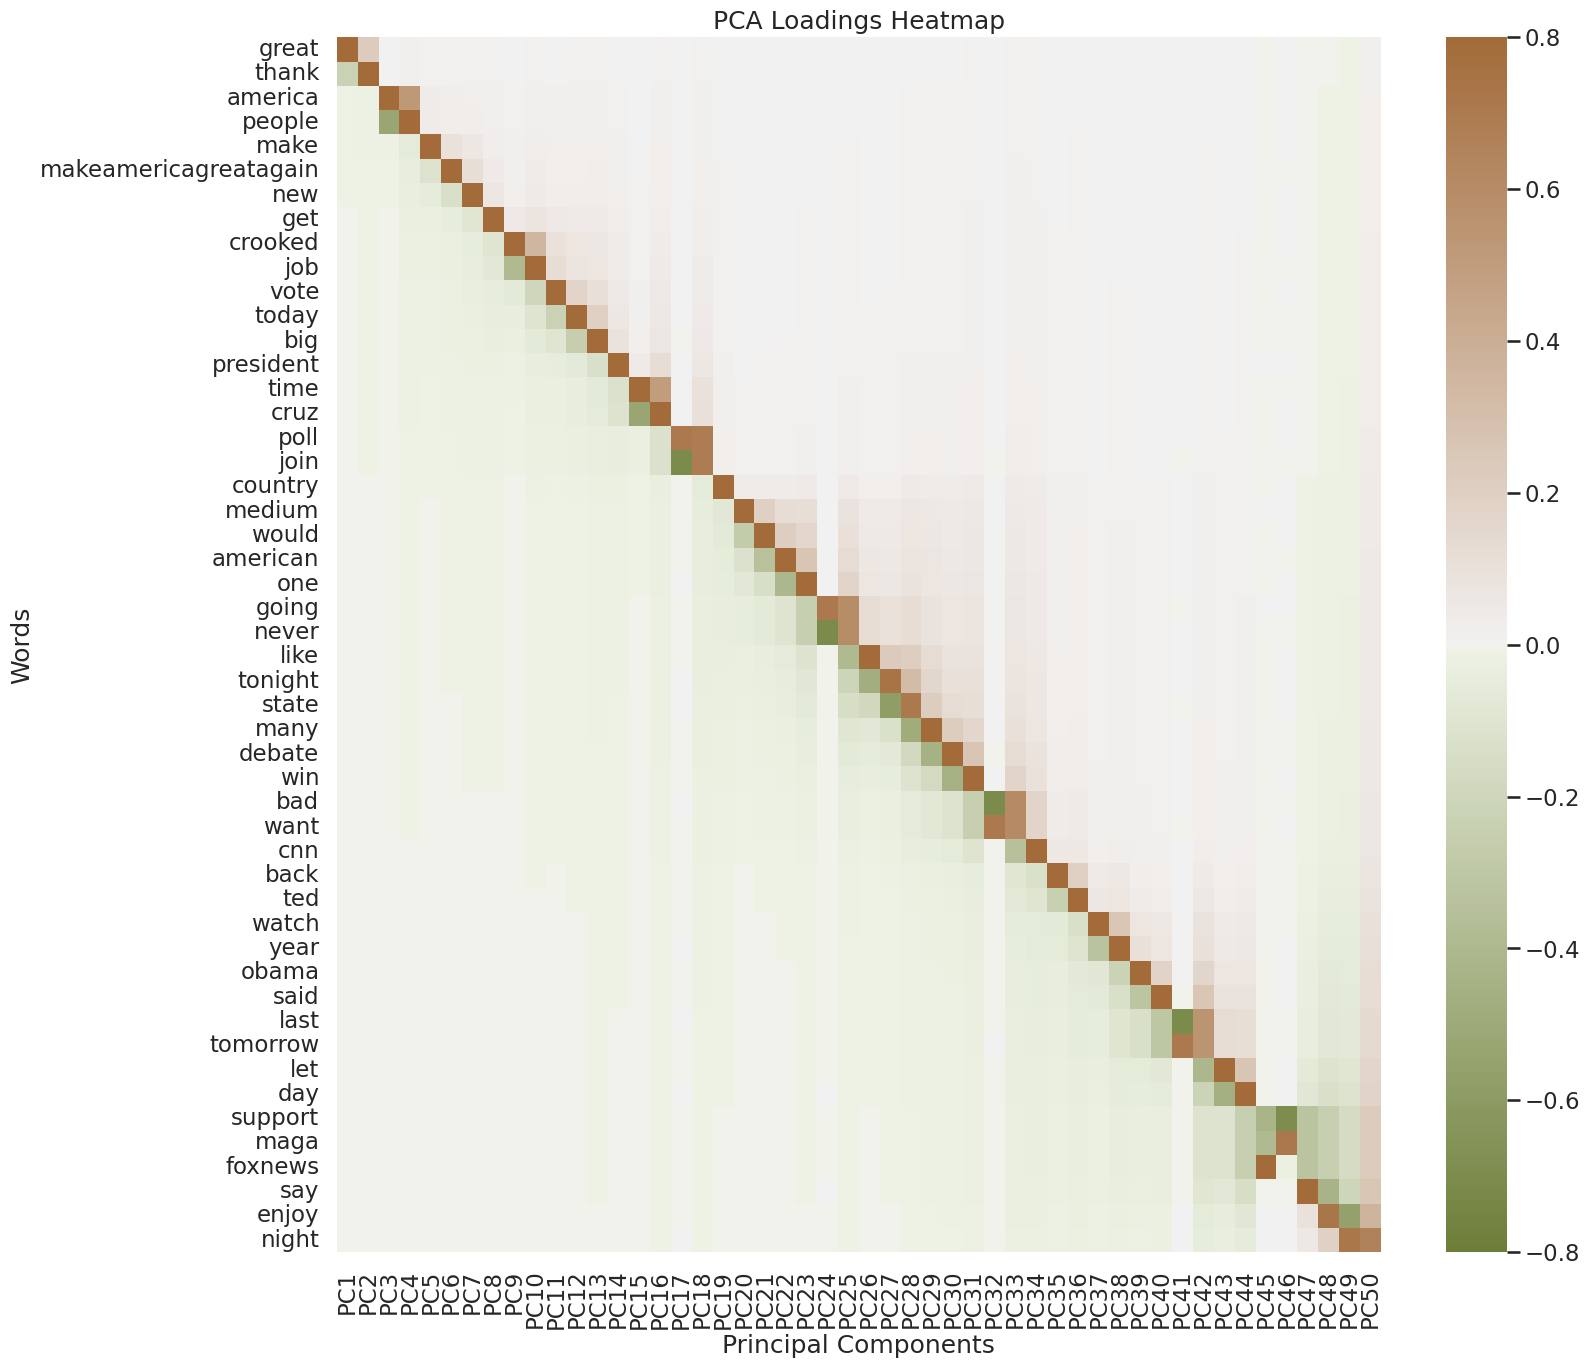

In [59]:
    # Ensure top_words is defined
    top_words = word_counts.index.tolist()

    # Assuming df_matrix is the document-frequency matrix
    # Assuming pca is the fitted PCA object
    loadings = pca.components_

    # Create a DataFrame with the loadings and the correct indexing for words and PCs
    loadings_df = pd.DataFrame(loadings.T, index=top_words, columns=[f'PC{i+1}' for i in range(50)])

    # Plotting the heatmap
plt.figure(figsize=(15, 15))  # Increase the figure size as needed
cmap = sns.diverging_palette(100, 400, as_cmap=True)
sns.heatmap(loadings_df, cmap=cmap, center=0, vmin=-0.8, vmax=0.8)
plt.title('PCA Loadings Heatmap')
plt.xlabel('Principal Components')
plt.ylabel('Words')
plt.xticks(ticks=np.arange(0.5, len(loadings_df.columns), 1), labels=loadings_df.columns, rotation=90)
plt.yticks(ticks=np.arange(0.5, len(loadings_df.index), 1), labels=loadings_df.index, rotation=0)
plt.show()


### Task 5.4 PCA Compare
We can determine how many words and how many components are needed to do a good visualization. Plot PC1 and PC2 in a 2D plot. The results should be similar to following scatter plot 

![title](images/PC1_PC2.png)

This is a scatter plot of the values of the components, but with arrows indicating some of the prominent terms as indicated by their loading factors. The values of the loading factors are used to determine the length and direction of these arrows and as such they serve as a way of expressing direction. That is, tweets which use these terms will be moved along the length of those arrows. Shown are the most important parameters.

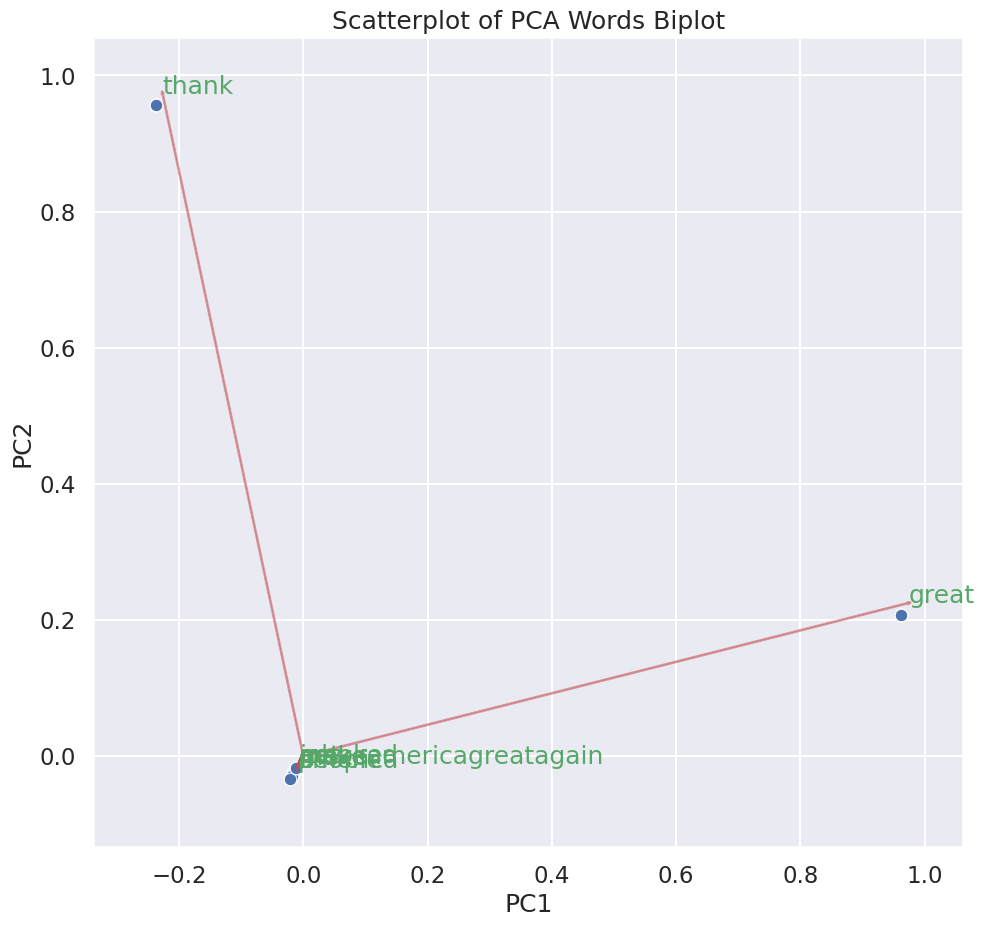

In [61]:
### BEGIN ANSWER
   
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming pca is already fitted with your data
# Extract the first two principal components
pca1 = principal_components[:, 0]  # PC1
pca2 = principal_components[:, 1]  # PC2

# Create a scatter plot of the first two principal components
plt.figure(figsize=(10, 10))
sns.scatterplot(x=pca1, y=pca2)

# Assuming 'loadings' contains the loadings of the PCA
loadings = pca.components_

# Get the number of components and features
n_pcs= pca.components_.shape[0]
n_features = pca.components_.shape[1]

# We are interested in the loading scores of the first two PCs
for i in range(n_features):
    plt.arrow(0, 0, loadings[0, i], loadings[1, i], color='r', alpha=0.5)
    if i < 10:  # Let's annotate the first 10 words for clarity
        plt.text(loadings[0, i], loadings[1, i], vectorizer.get_feature_names_out()[i], color='g')

# Set the limits of the plot
plt.xlim(min(pca1)-0.1, max(pca1)+0.1)
plt.ylim(min(pca2)-0.1, max(pca2)+0.1)

# Label the axes
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatterplot of PCA Words Biplot')

# Show the plot
plt.show()

### END ANSWER

Created by Andy Gunawardena @2023 Credits: Josh Hug, and Berkeley Data Science Group, Steve Skiena, David Rodreguez

@ Copyrighted Material. DO NOT post online.